In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
import geopandas as gpd
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA

In [2]:
colors = {
    'Developed': '#269d23',
    'Developing': '#f18329'
}

In [3]:
def get_latex(df):
    print(df.to_latex().replace('tabular', 'tabu').replace('_', '\_'))

In [54]:
df = pd.read_csv('Life Expectancy Data.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [226]:
desc_df = pd.read_csv('data_descriptions.csv')
desc_df
# get_latex(desc_df)

,Feature,Description,Data Type
0,country,Country name,String
1,year,Year of data collection,Numeric
2,status,Developing or developed,String
3,life_expectancy,Life expectancy age in years,Numeric
4,adult_mortality,Adult Mortality Rates of both sexes (probabili...,Numeric
5,infant_deaths,Number of Infant Deaths per 1000 population,Numeric
6,alcohol,"Alcohol, recorded per capita (15+) consumption...",Numeric
7,percentage_expenditure,Expenditure on health as a percentage of Gross...,Numeric
8,hepatitis_b,Hepatitis B (HepB) immunization coverage among...,Numeric
9,measles,Measles - number of reported cases per 1000 po...,Numeric


### Checking the data types

In [55]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### Checking for null values

In [56]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [57]:
missing_values_before = df.isna().sum().sort_values(ascending=False)[:14]
missing_values_before

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
dtype: int64

### Performing linear interpolation by country to fill in missing values

In [58]:
country_list = df['Country'].unique()
df2 = df.copy()

for country in country_list:
    df2.loc[df['Country'] == country] = df.loc[df['Country'] == country].interpolate()

In [59]:
missing_values_after = df2.isnull().sum()[missing_values_before.index]
missing_values_after

Population                         652
Hepatitis B                        144
GDP                                422
Total expenditure                  211
Alcohol                            193
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                                0
Diphtheria                           0
Life expectancy                     10
Adult Mortality                     10
dtype: int64

### Comparing before and after

In [60]:
missing_combined = pd.concat([missing_values_before, missing_values_after], axis=1)
missing_combined = missing_combined.rename(columns={0: 'Before', 1: 'After'})
missing_combined['% Decrease'] = np.round((1 - missing_combined['After'] / missing_combined['Before']) * 100, 2)
missing_combined
# get_latex(missing_combined)

,Before,After,% Decrease
Population,652,652,0.00
Hepatitis B,553,144,73.96
GDP,448,422,5.80
Total expenditure,226,211,6.64
Alcohol,194,193,0.52
Income composition of resources,167,167,0.00
Schooling,163,163,0.00
thinness 5-9 years,34,34,0.00
thinness 1-19 years,34,34,0.00
BMI,34,34,0.00


In [61]:
df2.dropna(inplace=True)
print(f'Shape: {df2.shape}')
df2.head()

Shape: (1987, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Fixing the structure of the columns names

In [62]:
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_')
df2.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Saving the clean dataset

In [63]:
df2.to_csv('data_cleaned.csv', index=False)
del df
del df2

In [4]:
df = pd.read_csv('data_cleaned.csv')
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Exploratory Data Analysis

In [61]:
df2 = df.select_dtypes(include='number').iloc[:,1:]
df2

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1983,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1984,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1985,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


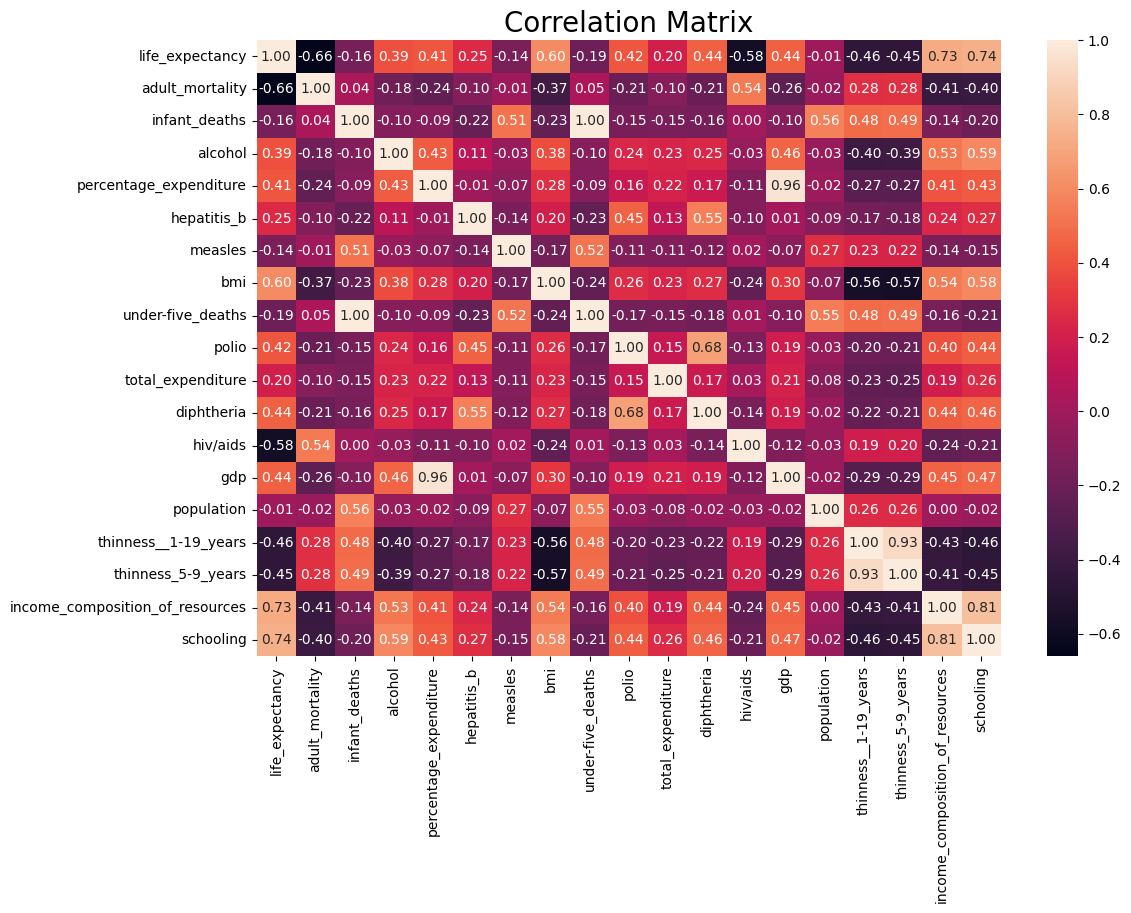

In [486]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True, fmt='.2f', ax=ax)
ax.set_title('Correlation Matrix', fontsize=20)
# fig.savefig('images/corr_matrix.png')
plt.show()

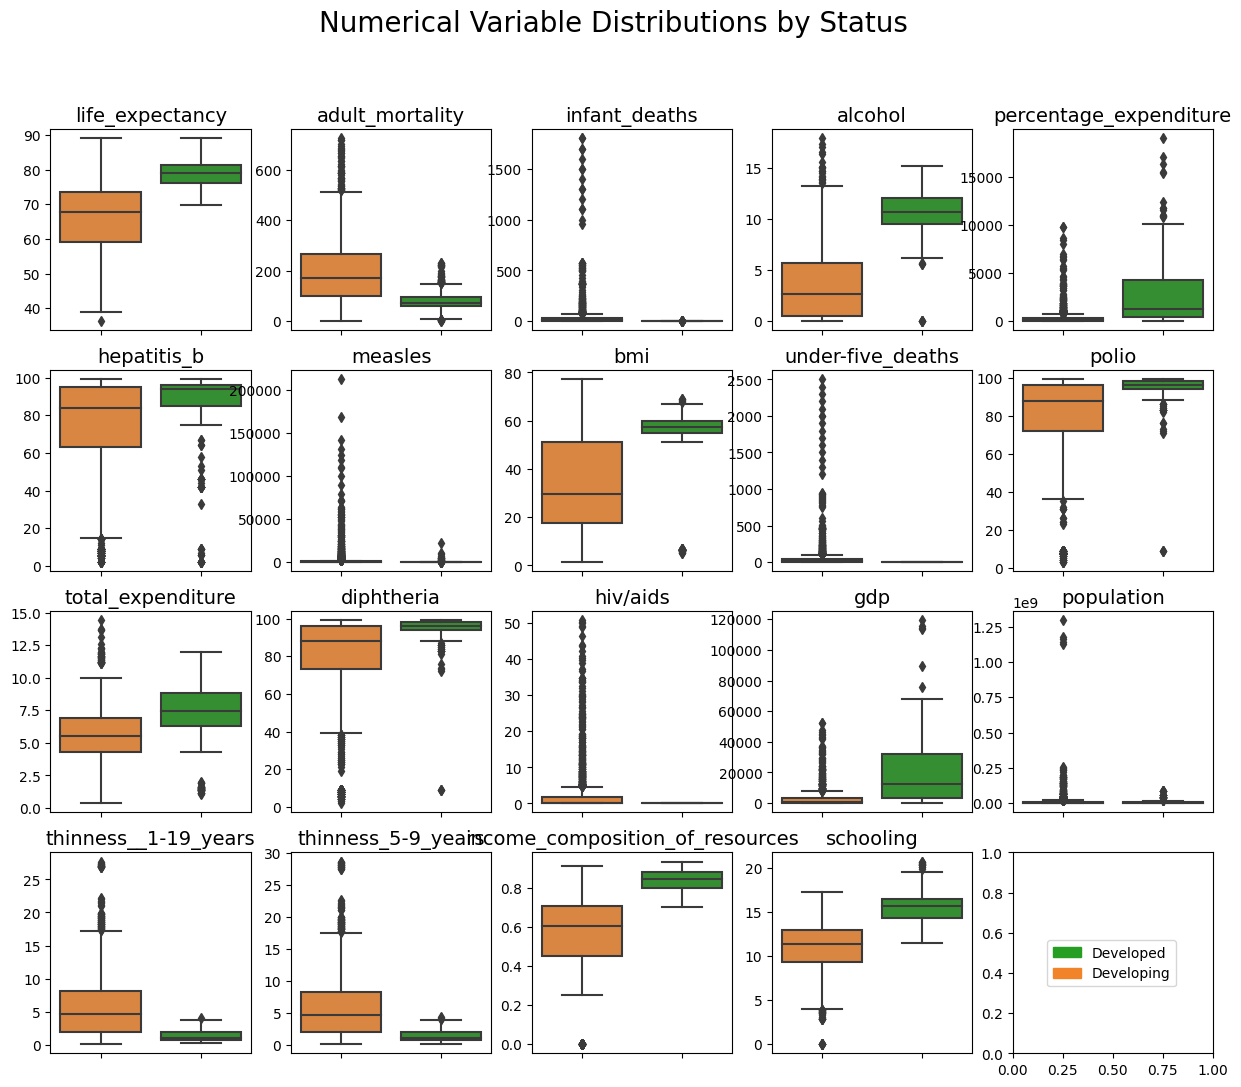

In [488]:
columns = df2.columns
fig, ax = plt.subplots(4,5,figsize=(15,12))
for col, axi in zip(columns, ax.ravel()):
    sns.boxplot(data=df, x='status', y=col, ax=axi, palette=colors)
    axi.set_title(col, fontsize=14)
    axi.set_xticklabels([])
    axi.set_xlabel('')
    axi.set_ylabel('')
    
fig.suptitle('Numerical Variable Distributions by Status', fontsize=20)

fig.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colors['Developed'], label='Developed'),
                   plt.Rectangle((0, 0), 1, 1, color=colors['Developing'], label='Developing')], loc='lower right', bbox_to_anchor=(0.88,0.16))
# fig.savefig('images/numeric_boxplots_by_status.png')
plt.show()

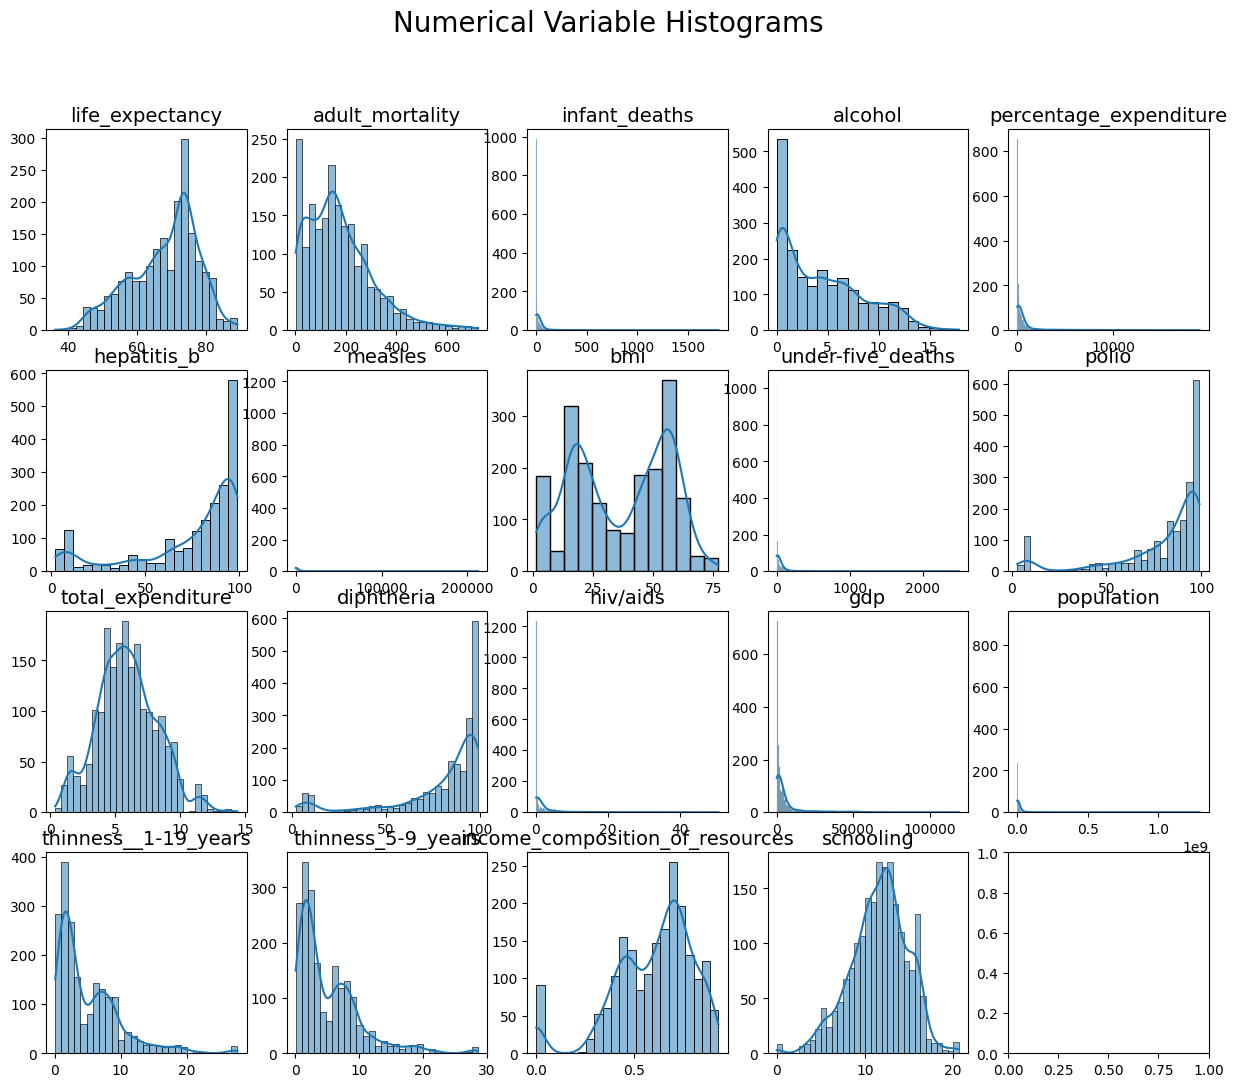

In [227]:
columns = df2.columns
fig, ax = plt.subplots(4,5,figsize=(15,12))
for col, axi in zip(columns, ax.ravel()):
    sns.histplot(data=df, x=col, ax=axi, kde=True)
    axi.set_title(col, fontsize=14)
    # axi.set_xticklabels([])
    axi.set_xlabel('')
    axi.set_ylabel('')
    
fig.suptitle('Numerical Variable Histograms', fontsize=20)

# fig.savefig('images/numeric_histograms.png')
plt.show()

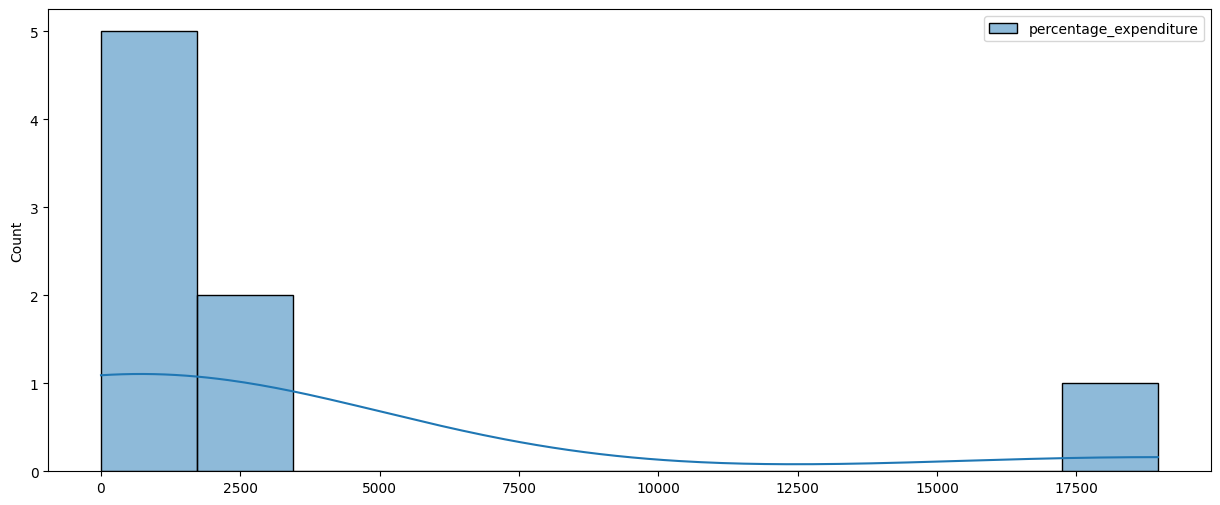

In [257]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(df[['percentage_expenditure']].describe(), ax=ax, kde=True)
plt.show()

In [71]:
skewed_features = ['infant_deaths', 'percentage_expenditure', 'measles', 'under-five_deaths', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years', 'thinness_5-9_years']
skewed_data = df[skewed_features]
skewed_data

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years
0,62,71.279624,1154,83,65.0,0.1,584.259210,33736494.0,17.2,17.3
1,64,73.523582,492,86,62.0,0.1,612.696514,327582.0,17.5,17.5
2,66,73.219243,430,89,64.0,0.1,631.744976,31731688.0,17.7,17.7
3,69,78.184215,2787,93,67.0,0.1,669.959000,3696958.0,17.9,18.0
4,71,7.097109,3013,97,68.0,0.1,63.537231,2978599.0,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...
1982,27,0.000000,31,42,65.0,33.6,454.366654,12777511.0,9.4,9.4
1983,26,0.000000,998,41,68.0,36.7,453.351155,12633897.0,9.8,9.9
1984,25,0.000000,304,40,71.0,39.8,57.348340,125525.0,1.2,1.3
1985,25,0.000000,529,39,75.0,42.1,548.587312,12366165.0,1.6,1.7


In [72]:
transformer = PowerTransformer(method='yeo-johnson')
transformed_data = pd.DataFrame(transformer.fit_transform(df[skewed_features]), columns=['yjt_'+ col for col in df[skewed_features].columns])
transformed_data

,yjt_infant_deaths,yjt_percentage_expenditure,yjt_measles,yjt_under-five_deaths,yjt_diphtheria,yjt_hiv/aids,yjt_gdp,yjt_population,yjt_thinness__1-19_years,yjt_thinness_5-9_years
0,1.292426,-0.224847,1.097494,1.267016,-1.110469,-0.778555,-0.459525,1.383765,1.767381,1.766530
1,1.304939,-0.209318,0.903062,1.280495,-1.236867,-0.778555,-0.433605,-0.534863,1.786748,1.779720
2,1.316997,-0.211396,0.870807,1.293436,-1.153627,-0.778555,-0.416891,1.354096,1.799468,1.792757
3,1.334293,-0.178525,1.281862,1.309920,-1.021032,-0.778555,-0.384798,0.390167,1.812038,1.812032
4,1.345336,-1.352270,1.297391,1.325595,-0.974735,-0.778555,-1.635897,0.301131,1.830620,1.824701
...,...,...,...,...,...,...,...,...,...,...
1982,0.938166,-2.458715,0.152063,0.992653,-1.110469,1.853759,-0.596197,0.928336,1.083865,1.064647
1983,0.920861,-2.458715,1.065529,0.982392,-0.974735,1.855788,-0.597409,0.923215,1.131244,1.124196
1984,0.902768,-2.458715,0.785775,0.971839,-0.829426,1.857444,-1.688387,-0.859479,-1.039694,-0.973903
1985,0.902768,-2.458715,0.920249,0.960977,-0.620383,1.858487,-0.493843,0.913523,-0.794224,-0.745321


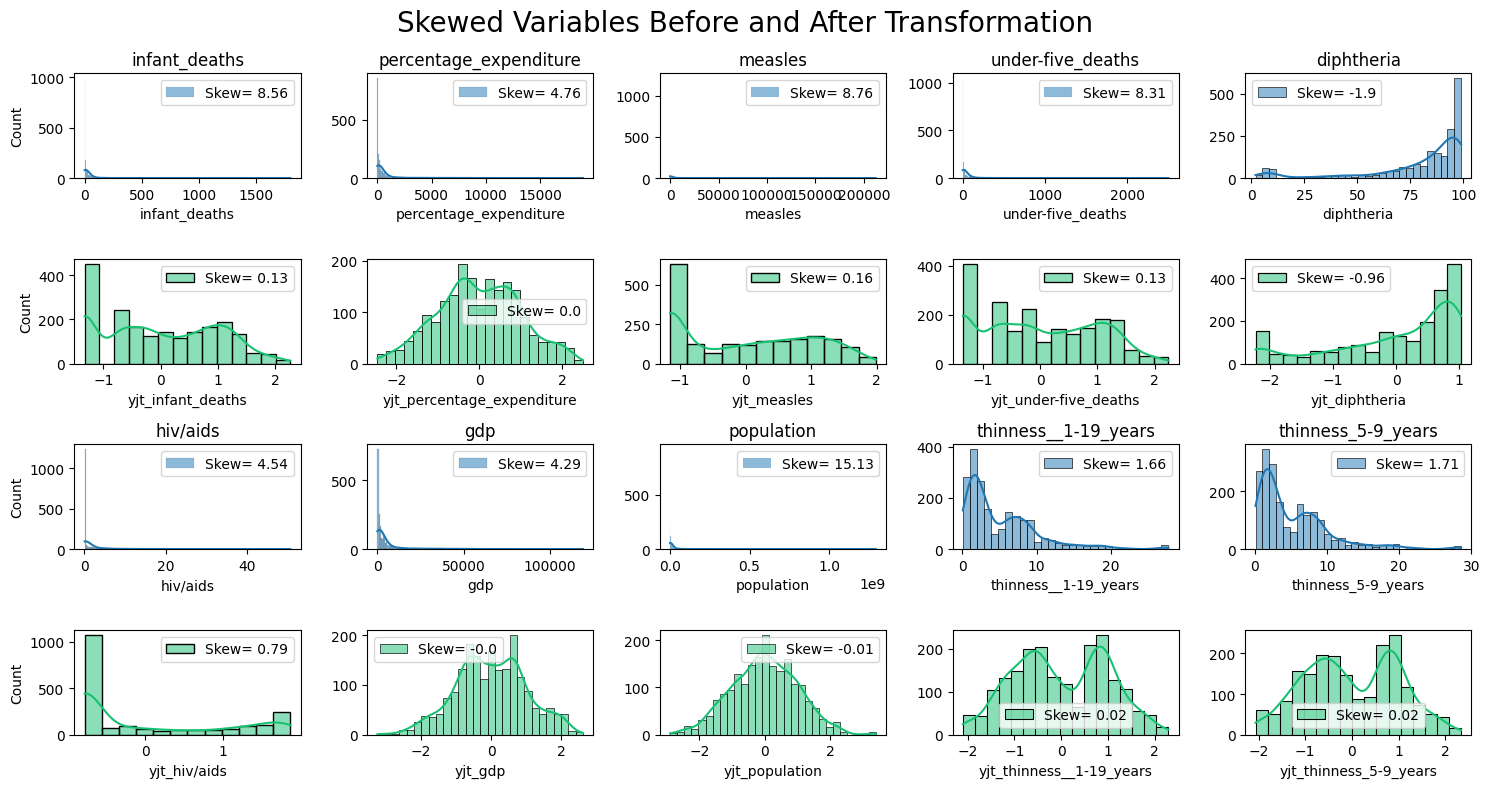

In [316]:
fig, ax = plt.subplots(4, 5, figsize=(15,8))
for i in range(5):
    tmp1 = skewed_data.iloc[:,i]
    tmp2 = transformed_data.iloc[:,i]
    skew1 = stats.skew(tmp1)
    skew2 = stats.skew(tmp2)
    
    sns.histplot(skewed_data.iloc[:,i], ax=ax[0,i], kde=True, label=f"Skew= {np.round(skew1, 2)}")
    sns.histplot(transformed_data.iloc[:,i], ax=ax[1,i], kde=True, color='#18c172', label=f"Skew= {np.round(skew2, 2)}")
    
    tmp1 = skewed_data.iloc[:,i+5]
    tmp2 = transformed_data.iloc[:,i+5]
    skew1 = stats.skew(tmp1)
    skew2 = stats.skew(tmp2)
    
    sns.histplot(skewed_data.iloc[:,i+5], ax=ax[2,i], kde=True, label=f"Skew= {np.round(skew1, 2)}")
    sns.histplot(transformed_data.iloc[:,i+5], ax=ax[3,i], kde=True, color='#18c172', label=f"Skew= {np.round(skew2, 2)}")
    
    # ax[0,i].set_xlabel('')
    # ax[1,i].set_xlabel('')
    ax[0,i].set_title(skewed_data.iloc[:,i].name, fontsize=12)
    ax[2,i].set_title(skewed_data.iloc[:,i+5].name, fontsize=12)
    if i != 0:
        ax[0,i].set_ylabel('')
        ax[1,i].set_ylabel('')
        ax[2,i].set_ylabel('')
        ax[3,i].set_ylabel('')
        
for axi in ax.ravel():
    axi.legend()

fig.suptitle('Skewed Variables Before and After Transformation', fontsize=20)
fig.tight_layout()
# fig.savefig('images/yeo_johnson_transformation.png')
plt.show()


In [80]:
df_transformed = pd.concat([df.drop(columns=skewed_features), transformed_data], axis=1)
df_transformed

,country,year,status,life_expectancy,adult_mortality,alcohol,hepatitis_b,bmi,polio,total_expenditure,...,yjt_infant_deaths,yjt_percentage_expenditure,yjt_measles,yjt_under-five_deaths,yjt_diphtheria,yjt_hiv/aids,yjt_gdp,yjt_population,yjt_thinness__1-19_years,yjt_thinness_5-9_years
0,Afghanistan,2015,Developing,65.0,263.0,0.01,65.0,19.1,6.0,8.16,...,1.292426,-0.224847,1.097494,1.267016,-1.110469,-0.778555,-0.459525,1.383765,1.767381,1.766530
1,Afghanistan,2014,Developing,59.9,271.0,0.01,62.0,18.6,58.0,8.18,...,1.304939,-0.209318,0.903062,1.280495,-1.236867,-0.778555,-0.433605,-0.534863,1.786748,1.779720
2,Afghanistan,2013,Developing,59.9,268.0,0.01,64.0,18.1,62.0,8.13,...,1.316997,-0.211396,0.870807,1.293436,-1.153627,-0.778555,-0.416891,1.354096,1.799468,1.792757
3,Afghanistan,2012,Developing,59.5,272.0,0.01,67.0,17.6,67.0,8.52,...,1.334293,-0.178525,1.281862,1.309920,-1.021032,-0.778555,-0.384798,0.390167,1.812038,1.812032
4,Afghanistan,2011,Developing,59.2,275.0,0.01,68.0,17.2,68.0,7.87,...,1.345336,-1.352270,1.297391,1.325595,-0.974735,-0.778555,-1.635897,0.301131,1.830620,1.824701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,Zimbabwe,2004,Developing,44.3,723.0,4.36,68.0,27.1,67.0,7.13,...,0.938166,-2.458715,0.152063,0.992653,-1.110469,1.853759,-0.596197,0.928336,1.083865,1.064647
1983,Zimbabwe,2003,Developing,44.5,715.0,4.06,7.0,26.7,7.0,6.52,...,0.920861,-2.458715,1.065529,0.982392,-0.974735,1.855788,-0.597409,0.923215,1.131244,1.124196
1984,Zimbabwe,2002,Developing,44.8,73.0,4.43,73.0,26.3,73.0,6.53,...,0.902768,-2.458715,0.785775,0.971839,-0.829426,1.857444,-1.688387,-0.859479,-1.039694,-0.973903
1985,Zimbabwe,2001,Developing,45.3,686.0,1.72,76.0,25.9,76.0,6.16,...,0.902768,-2.458715,0.920249,0.960977,-0.620383,1.858487,-0.493843,0.913523,-0.794224,-0.745321


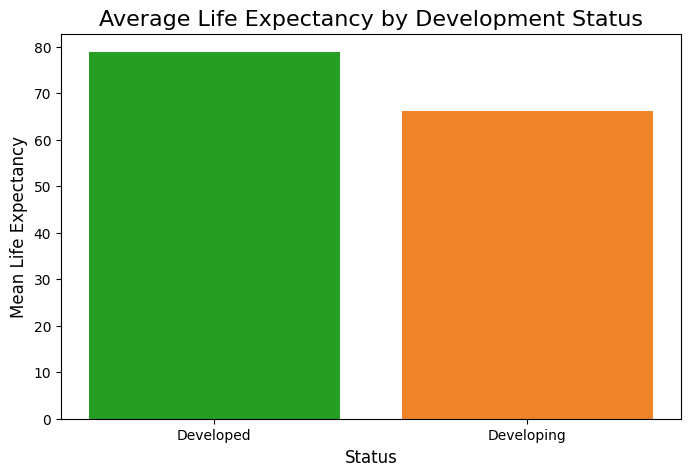

In [497]:
data = df.groupby('status')['life_expectancy'].mean()
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(data.index, data.values, color=colors.values())
# ax.set_title('Average Life Expectancy by Country Development Status', fontsize=16)
ax.set_xlabel('Status', fontsize=12)
ax.set_ylabel('Mean Life Expectancy', fontsize=12)
ax.set_title('Average Life Expectancy by Development Status', fontsize=16)
# fig.savefig('images/avg_life_exp_by_status.png')
plt.show()

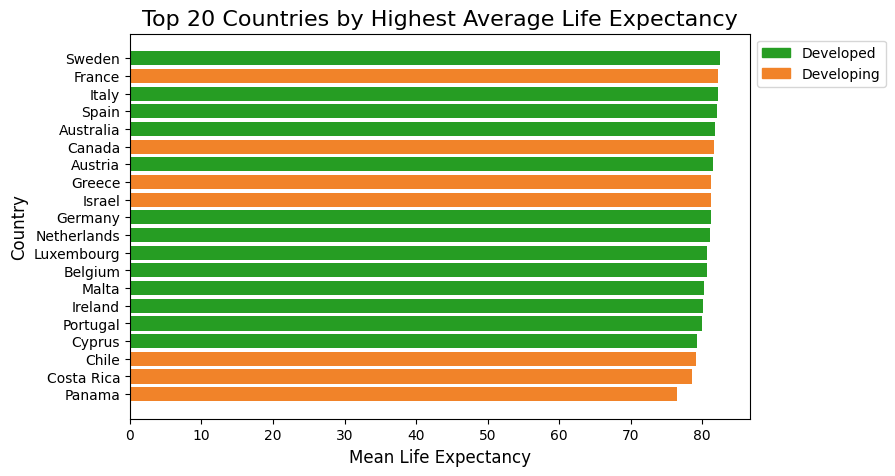

In [499]:
data = df.groupby('country')['life_expectancy'].mean().sort_values(ascending=False)[:20][::-1]
cmap = df.groupby('country')['status'].first().reindex(data.index).map(colors)

fig, ax = plt.subplots(figsize=(8,5))
ax.barh(data.index, data.values, color=cmap)
ax.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colors['Developed'], label='Developed'),
                   plt.Rectangle((0, 0), 1, 1, color=colors['Developing'], label='Developing')], loc='upper right', bbox_to_anchor=(1.23, 1))
# ax.set_xlim(0, ax.get_xlim()[1]+20)
ax.set_xlabel('Mean Life Expectancy', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
ax.set_title('Top 20 Countries by Highest Average Life Expectancy', fontsize=16)
# fig.savefig('images/top_20_countries_largest_life_exp.png')
plt.show()

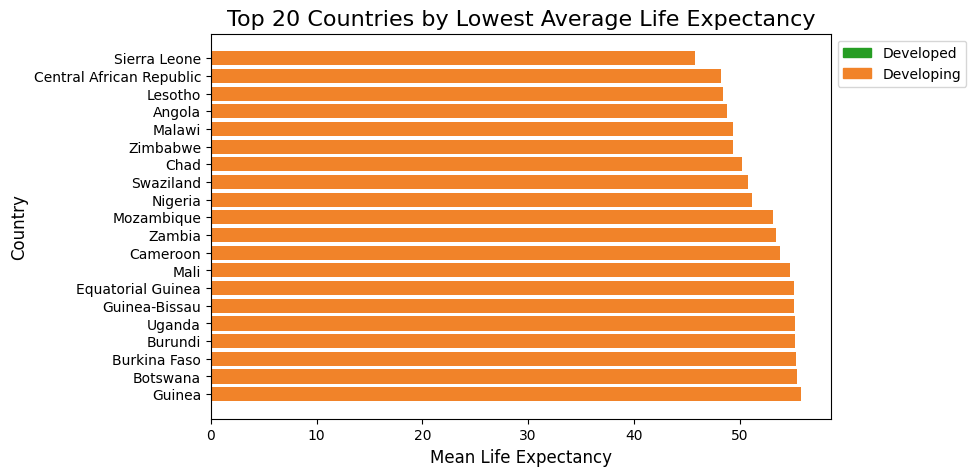

In [501]:
data = df.groupby('country')['life_expectancy'].mean().sort_values(ascending=True)[:20][::-1]
cmap = df.groupby('country')['status'].first().reindex(data.index).map(colors)

fig, ax = plt.subplots(figsize=(8,5))
ax.barh(data.index, data.values, color=cmap)
ax.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colors['Developed'], label='Developed'),
                   plt.Rectangle((0, 0), 1, 1, color=colors['Developing'], label='Developing')], loc='upper right', bbox_to_anchor=(1.23, 1))
# ax.set_xlim(0, ax.get_xlim()[1]+20)
ax.set_xlabel('Mean Life Expectancy', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
ax.set_title('Top 20 Countries by Lowest Average Life Expectancy', fontsize=16)
# fig.savefig('images/top_20_countries_smallest_life_exp.png')
plt.show()

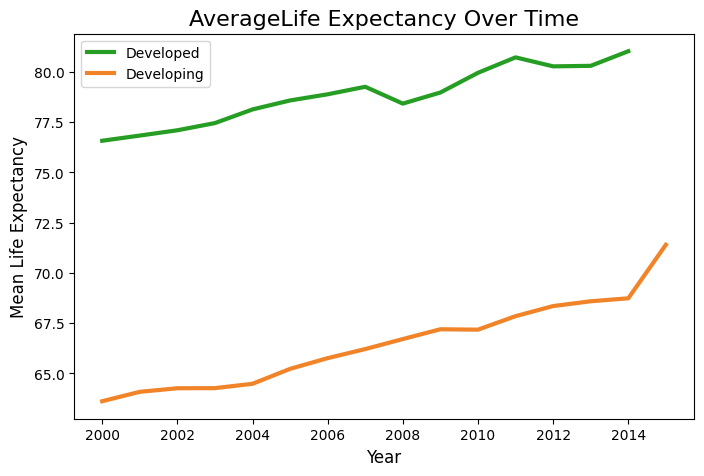

In [504]:
data = df.groupby(['status', 'year'])['life_expectancy'].mean()

fig, ax = plt.subplots(figsize=(8,5))
for status in ['Developed', 'Developing']:
    ax.plot(data[status].index, data[status].values, color=colors[status], label=status, linewidth=3)
    
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Mean Life Expectancy', fontsize=12)
ax.legend()
ax.set_title('AverageLife Expectancy Over Time', fontsize=16)
# fig.savefig('images/avg_life_exp_by_status_time.png')
plt.show()


In [505]:
gdf = gpd.read_file('countries/ne_110m_admin_0_countries.shp')

In [506]:
merged_gdf = gdf.merge(df, left_on='NAME_LONG', right_on='country')

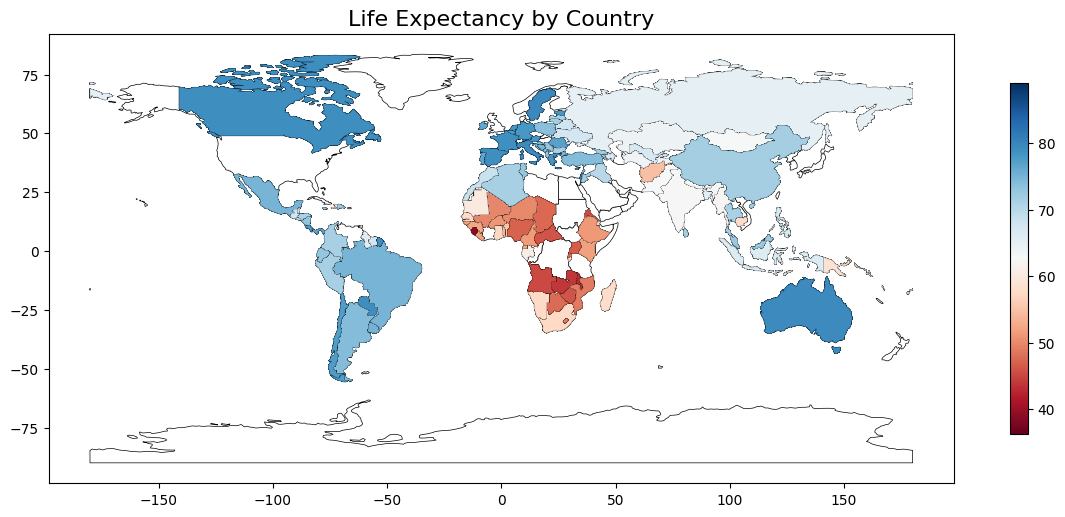

In [507]:
fig, ax = plt.subplots(figsize=(12,12))
gdf.plot(color='white', edgecolor='black', linewidth=0.5, ax=plt.gca())
merged_gdf.plot(column='life_expectancy', cmap='RdBu', ax=ax, legend=True, legend_kwds={'shrink': 0.3}, edgecolor='black', linewidth=0.1)
ax.set_title('Life Expectancy by Country', fontsize=16)
fig.tight_layout()
# fig.savefig('images/life_exp_map.png')
plt.show()

### Principal Component Analysis

In [91]:
pca_data = df.drop(columns=['country', 'year', 'status', 'life_expectancy'])
pca_data.head()

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [84]:
pca_data = df_transformed.drop(columns=['country', 'year', 'status', 'life_expectancy'])
pca_data.head()

,adult_mortality,alcohol,percentage_expenditure,hepatitis_b,bmi,polio,total_expenditure,diphtheria,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,yjt_infant_deaths,yjt_measles,yjt_under-five_deaths,yjt_hiv/aids,yjt_population
0,263.0,0.01,71.279624,65.0,19.1,6.0,8.16,65.0,584.259210,17.2,17.3,0.479,10.1,1.292426,1.097494,1.267016,-0.778555,1.383765
1,271.0,0.01,73.523582,62.0,18.6,58.0,8.18,62.0,612.696514,17.5,17.5,0.476,10.0,1.304939,0.903062,1.280495,-0.778555,-0.534863
2,268.0,0.01,73.219243,64.0,18.1,62.0,8.13,64.0,631.744976,17.7,17.7,0.470,9.9,1.316997,0.870807,1.293436,-0.778555,1.354096
3,272.0,0.01,78.184215,67.0,17.6,67.0,8.52,67.0,669.959000,17.9,18.0,0.463,9.8,1.334293,1.281862,1.309920,-0.778555,0.390167
4,275.0,0.01,7.097109,68.0,17.2,68.0,7.87,68.0,63.537231,18.2,18.2,0.454,9.5,1.345336,1.297391,1.325595,-0.778555,0.301131


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca_data_scaled = pd.DataFrame(scaler.fit_transform(pca_data), columns=pca_data.columns)
pca_data_scaled.head()

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,0.667352,0.182893,-1.118195,-0.348742,-0.305354,-0.130219,-0.878237,0.169772,-3.053380,0.987048,-0.632239,-0.362272,-0.418898,0.310590,2.541614,2.498502,-0.604216,-0.479134
1,0.728150,0.197308,-1.118195,-0.347468,-0.408728,-0.184932,-0.903577,0.185654,-0.918491,0.995794,-0.754969,-0.362272,-0.416420,-0.204305,2.604786,2.539798,-0.618781,-0.510266
2,0.705351,0.211722,-1.118195,-0.347640,-0.339812,-0.190057,-0.928918,0.201537,-0.754269,0.973930,-0.673149,-0.362272,-0.414761,0.279692,2.646900,2.581093,-0.647910,-0.541398
3,0.735750,0.233344,-1.118195,-0.344821,-0.236438,0.004747,-0.954258,0.222714,-0.548991,1.144467,-0.550419,-0.362272,-0.411431,-0.152377,2.689015,2.643036,-0.681895,-0.572530
4,0.758549,0.247758,-1.118195,-0.385184,-0.201980,0.023426,-0.974531,0.243891,-0.507936,0.860238,-0.509510,-0.362272,-0.464265,-0.163448,2.752186,2.684331,-0.725590,-0.665925


In [16]:
pca = PCA()
pca_results = pd.DataFrame(pca.fit_transform(pca_data_scaled), columns=["PC" + str(i+1) for i in range(pca_data_scaled.shape[1])])
pca_results

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-4.027233,1.416554,-0.185304,1.079945,-1.100787,1.813698,-1.471821,-0.966206,2.026309,-0.127029,-0.391411,0.962715,-0.676363,1.070768,0.101833,0.093249,0.017341,0.014729
1,-3.494518,0.506308,-0.661564,2.019550,-0.529599,1.789190,-1.082446,0.105628,0.888502,-0.646913,-0.697437,0.041503,0.685013,0.749624,0.078652,0.099790,-0.005745,0.015239
2,-3.653454,1.262518,-1.199734,1.411237,-0.673019,1.634473,-1.258253,-1.126964,0.780498,-0.577958,-0.086538,0.510330,0.468645,0.433713,-0.004411,0.081907,0.005918,0.015736
3,-3.609538,1.009243,-1.266172,1.814017,-0.448100,1.877756,-1.143651,-0.249004,0.741334,-0.708306,-0.189441,0.345140,0.582753,0.527707,0.007285,0.070970,0.001190,0.013479
4,-3.730160,0.915231,-1.349306,1.890785,-0.526239,1.655765,-1.046340,-0.173435,0.745436,-0.702697,-0.155904,0.283411,0.595148,0.571751,-0.028033,0.089018,-0.010506,0.015162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,-3.499614,0.424176,0.222644,-0.556976,3.036699,-0.845516,-1.244435,-0.753893,0.867371,-1.498845,-0.105147,0.294149,0.363928,0.291073,-0.028275,0.044576,0.003361,-0.005696
1983,-4.475486,1.167020,2.100699,-0.560891,1.892603,-0.849842,-1.944120,-0.264528,0.780439,-1.805224,-0.500263,0.870714,-1.286977,1.304948,0.139384,0.115157,0.023182,0.009234
1984,-1.357849,-0.160627,0.636101,-1.234586,0.698306,0.588316,0.792633,1.473210,-0.663756,1.111415,-0.061491,-0.810755,-0.363754,-0.518074,0.517006,-0.087505,-0.029162,0.018506
1985,-2.653364,0.319713,0.145508,-1.997637,2.954950,-1.052735,0.177440,0.154459,0.383905,-1.702072,-0.181892,1.032968,0.014078,-0.207876,0.174578,0.006629,-0.005287,0.005271


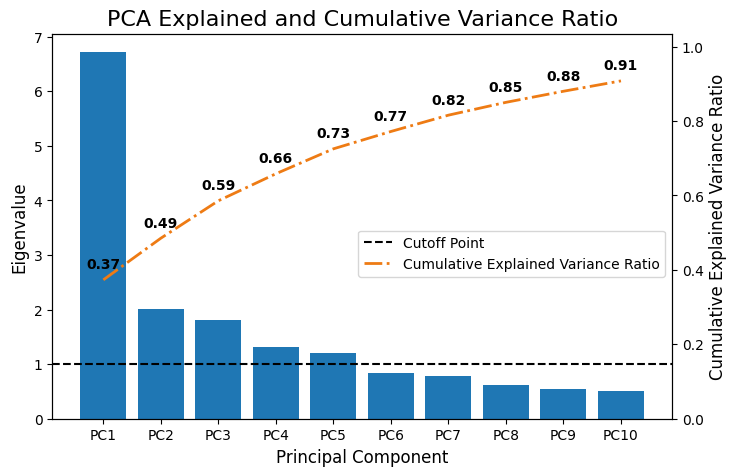

In [555]:
data = pca.explained_variance_[:10]
data2 = np.cumsum(pca.explained_variance_ratio_)[:10]
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(['PC' + str(i+1) for i in range(len(data))], data)
# ax.hlines(1, 0, 10, colors='k', linestyles='--')
# ax.plot([0,10],[1,1], color='k')
ax.axhline(y=1, color='k', linestyle='--', label='Cutoff Point')
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Eigenvalue', fontsize=12)
#ax.legend()

ax2 = ax.twinx()
ax2.plot(['PC' + str(i+1) for i in range(len(data))], data2, linestyle='dashdot', linewidth=2,
         color='#EE7B14', label='Cumulative Explained Variance Ratio')
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)
for i in range(len(data2)):
    ax2.text(i-0.3, data2[i]+0.03, np.round(data2[i], 2), fontsize=10, fontweight='semibold')
fig.legend(bbox_to_anchor=(0,0,0.9,0.5))
ax2.set_ylim(0, ax2.get_ylim()[1]+0.1)
ax.set_title('PCA Explained and Cumulative Variance Ratio', fontsize=16)
# fig.savefig('images/pca_explained_variance.png')
plt.show()

In [103]:
fa = FactorAnalyzer(5, rotation='varimax', method='mle')
fa.fit(pca_data_scaled)

FactorAnalyzer(method='mle', n_factors=5, rotation='varimax',
               rotation_kwargs={})

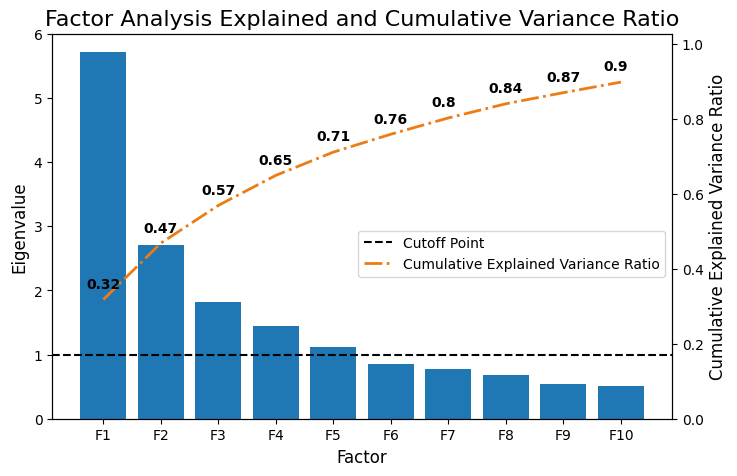

In [104]:
ev, v = fa.get_eigenvalues()
data = ev[:10]
data2 = (np.cumsum(ev) / np.sum(ev))[:10]

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(["F" + str(i+1) for i in range(len(data))], data)
ax.axhline(y=1, color='k', linestyle='--', label='Cutoff Point')

ax2 = ax.twinx()
ax2.plot(['F' + str(i+1) for i in range(len(data2))], data2, linestyle='dashdot', linewidth=2,
         color='#EE7B14', label='Cumulative Explained Variance Ratio')
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)

for i in range(len(data2)):
    ax2.text(i-0.3, data2[i]+0.03, np.round(data2[i], 2), fontsize=10, fontweight='semibold')
fig.legend(bbox_to_anchor=(0,0,0.9,0.5))
ax2.set_ylim(0, ax2.get_ylim()[1]+0.1)
ax.set_xlabel('Factor', fontsize=12)
ax.set_ylabel('Eigenvalue', fontsize=12)
ax.set_title('Factor Analysis Explained and Cumulative Variance Ratio', fontsize=16)
# fig.savefig('images/fa_explained_variance.png')
plt.show()

In [105]:
factor_loadings = fa.loadings_

# Set the cutoff value for loadings
cutoff_value = 0.4

# Filter the loadings based on the cutoff value
factor_loadings_filtered = factor_loadings.copy()
factor_loadings_filtered[abs(factor_loadings) < cutoff_value] = np.nan

# Create a new DataFrame with the filtered loadings and feature names
loadings_df = pd.DataFrame(factor_loadings_filtered, index=pca_data_scaled.columns, columns=[f'Factor_{i+1}' for i in range(5)])
loadings_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
adult_mortality,-0.416001,NaN,NaN,NaN,NaN
infant_deaths,NaN,0.978468,NaN,NaN,NaN
alcohol,0.559307,NaN,NaN,NaN,NaN
percentage_expenditure,NaN,NaN,0.942697,NaN,NaN
hepatitis_b,NaN,NaN,NaN,0.593847,NaN
measles,NaN,0.507653,NaN,NaN,NaN
bmi,0.581116,NaN,NaN,NaN,NaN
under-five_deaths,NaN,0.976387,NaN,NaN,NaN
polio,NaN,NaN,NaN,0.692005,NaN
total_expenditure,NaN,NaN,NaN,NaN,NaN


In [106]:
np.round(loadings_df, 3).astype(str).apply(lambda x: x.replace('nan', ''))

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
adult_mortality,-0.416,,,,
infant_deaths,,0.978,,,
alcohol,0.559,,,,
percentage_expenditure,,,0.943,,
hepatitis_b,,,,0.594,
measles,,0.508,,,
bmi,0.581,,,,
under-five_deaths,,0.976,,,
polio,,,,0.692,
total_expenditure,,,,,


In [73]:
skewed_features

['infant_deaths', 'measles', 'under-five_deaths', 'hiv/aids', 'population']

In [13]:
import statsmodels.api as sm

In [81]:
df_ols = df_transformed.copy()
df_ols['status'] = df_ols.status.map({'Developing': 0, 'Developed': 1})

df_ols.drop(columns=['country', 'year', 'life_expectancy'], inplace=True)
df_ols.head()

,status,adult_mortality,alcohol,hepatitis_b,bmi,polio,total_expenditure,income_composition_of_resources,schooling,yjt_infant_deaths,yjt_percentage_expenditure,yjt_measles,yjt_under-five_deaths,yjt_diphtheria,yjt_hiv/aids,yjt_gdp,yjt_population,yjt_thinness__1-19_years,yjt_thinness_5-9_years
0,0,263.0,0.01,65.0,19.1,6.0,8.16,0.479,10.1,1.292426,-0.224847,1.097494,1.267016,-1.110469,-0.778555,-0.459525,1.383765,1.767381,1.766530
1,0,271.0,0.01,62.0,18.6,58.0,8.18,0.476,10.0,1.304939,-0.209318,0.903062,1.280495,-1.236867,-0.778555,-0.433605,-0.534863,1.786748,1.779720
2,0,268.0,0.01,64.0,18.1,62.0,8.13,0.470,9.9,1.316997,-0.211396,0.870807,1.293436,-1.153627,-0.778555,-0.416891,1.354096,1.799468,1.792757
3,0,272.0,0.01,67.0,17.6,67.0,8.52,0.463,9.8,1.334293,-0.178525,1.281862,1.309920,-1.021032,-0.778555,-0.384798,0.390167,1.812038,1.812032
4,0,275.0,0.01,68.0,17.2,68.0,7.87,0.454,9.5,1.345336,-1.352270,1.297391,1.325595,-0.974735,-0.778555,-1.635897,0.301131,1.830620,1.824701


In [99]:
df_ols2 = df.copy()
df_ols2['status'] = df_ols2.status.map({'Developing': 0, 'Developed': 1})

df_ols2.drop(columns=['country', 'year', 'life_expectancy'], inplace=True)
df_ols2.head()

,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [352]:
X = sm.add_constant(df_ols.drop(columns=['polio', 'total_expenditure', 'yjt_thinness__1-19_years', 'bmi'])) # transformed data
y = df['life_expectancy']

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

In [353]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     762.8
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:05:43   Log-Likelihood:                -5429.8
No. Observations:                1987   AIC:                         1.089e+04
Df Residuals:                    1971   BIC:                         1.098e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              62.5174      0.606    103.208      0.000      61.329      63.705
status                              0.8268      0.329      2.513      0.012       0.182       1.472
adult_mortality                    -0.0147      0.001    -18.172      0.000      -0.016      -0.013
alcohol                            -0.0838      0.031     -2.681      0.007      -0.145      -0.023
hepatitis_b                        -0.0120      0.004     -3.344      0.001      -0.019      -0.005
income_composition_of_resources     8.9632      0.727     12.323      0.000       7.537      10.390
schooling                           0.3245      0.053      6.067      0.000       0.220       0.429
yjt_infant_deaths                   2.0618      0.848      2.430      0.015       0.398       3.726
yjt_percentage_expenditure          1.2593      0.239      5.274      0.000       0.791       1.728
yjt_measles                        -0.2329      0.110     -2.125      0.034      -0.448      -0.018
yjt_under-five_deaths              -3.0446      0.866     -3.518      0.000      -4.742      -1.347
yjt_diphtheria                      0.9006      0.122      7.365      0.000       0.661       1.140
yjt_hiv/aids                       -3.7166      0.129    -28.895      0.000      -3.969      -3.464
yjt_gdp                            -0.4788      0.240     -1.996      0.046      -0.949      -0.008
yjt_population                      0.3026      0.102      2.961      0.003       0.102       0.503
yjt_thinness_5-9_years             -0.6036      0.110     -5.476      0.000      -0.820      -0.387
==============================================================================
Omnibus:                       86.966   Durbin-Watson:                   0.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.849
Skew:                          -0.251   Prob(JB):                     2.43e-44
Kurtosis:                       4.475   Cond. No.                     3.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [366]:
X = sm.add_constant(df_ols2.drop(columns=['thinness_5-9_years', 'measles', 'gdp', 'hepatitis_b', 'population'])) # original data
X = sm.add_constant(df_ols2.drop(columns=['thinness_5-9_years', 'measles', 'hepatitis_b', 'population']))
y = df['life_expectancy']

# Fit the OLS model
model = sm.OLS(y, X)
results2 = model.fit()

In [367]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     660.3
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:37:26   Log-Likelihood:                -5550.7
No. Observations:                1987   AIC:                         1.113e+04
Df Residuals:                    1971   BIC:                         1.122e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              51.9437      0.612     84.817      0.000      50.743      53.145
status                              1.2561      0.349      3.597      0.000       0.571       1.941
adult_mortality                    -0.0152      0.001    -17.253      0.000      -0.017      -0.013
infant_deaths                       0.0886      0.009     10.273      0.000       0.072       0.106
alcohol                            -0.1259      0.033     -3.810      0.000      -0.191      -0.061
percentage_expenditure              0.0003      0.000      1.792      0.073   -3.21e-05       0.001
bmi                                 0.0579      0.006      9.327      0.000       0.046       0.070
under-five_deaths                  -0.0660      0.006    -10.389      0.000      -0.078      -0.054
polio                               0.0120      0.005      2.344      0.019       0.002       0.022
total_expenditure                   0.0642      0.042      1.544      0.123      -0.017       0.146
diphtheria                          0.0195      0.005      3.753      0.000       0.009       0.030
hiv/aids                           -0.4710      0.018    -26.312      0.000      -0.506      -0.436
gdp                              1.268e-05      3e-05      0.423      0.672   -4.61e-05    7.14e-05
thinness__1-19_years               -0.0439      0.027     -1.652      0.099      -0.096       0.008
income_composition_of_resources     8.2436      0.774     10.649      0.000       6.725       9.762
schooling                           0.8755      0.054     16.207      0.000       0.770       0.981
==============================================================================
Omnibus:                      122.236   Durbin-Watson:                   0.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.952
Skew:                          -0.068   Prob(JB):                    9.17e-113
Kurtosis:                       5.493   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [369]:
format(1.268e-05, 'f')

'0.000013'

In [350]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     762.8
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:05:24   Log-Likelihood:                -5429.8
No. Observations:                1987   AIC:                         1.089e+04
Df Residuals:                    1971   BIC:                         1.098e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              62.5174      0.606    103.208      0.000      61.329      63.705
status                              0.8268      0.329      2.513      0.012       0.182       1.472
adult_mortality                    -0.0147      0.001    -18.172      0.000      -0.016      -0.013
alcohol                            -0.0838      0.031     -2.681      0.007      -0.145      -0.023
hepatitis_b                        -0.0120      0.004     -3.344      0.001      -0.019      -0.005
income_composition_of_resources     8.9632      0.727     12.323      0.000       7.537      10.390
schooling                           0.3245      0.053      6.067      0.000       0.220       0.429
yjt_infant_deaths                   2.0618      0.848      2.430      0.015       0.398       3.726
yjt_percentage_expenditure          1.2593      0.239      5.274      0.000       0.791       1.728
yjt_measles                        -0.2329      0.110     -2.125      0.034      -0.448      -0.018
yjt_under-five_deaths              -3.0446      0.866     -3.518      0.000      -4.742      -1.347
yjt_diphtheria                      0.9006      0.122      7.365      0.000       0.661       1.140
yjt_hiv/aids                       -3.7166      0.129    -28.895      0.000      -3.969      -3.464
yjt_gdp                            -0.4788      0.240     -1.996      0.046      -0.949      -0.008
yjt_population                      0.3026      0.102      2.961      0.003       0.102       0.503
yjt_thinness_5-9_years             -0.6036      0.110     -5.476      0.000      -0.820      -0.387
==============================================================================
Omnibus:                       86.966   Durbin-Watson:                   0.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.849
Skew:                          -0.251   Prob(JB):                     2.43e-44
Kurtosis:                       4.475   Cond. No.                     3.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
results.fittedvalues

0       65.169182
1       64.363007
2       64.917912
3       64.459615
4       63.324825
          ...    
1982    45.140763
1983    46.074018
1984    56.375085
1985    47.491632
1986    46.672329
Length: 1987, dtype: float64

In [116]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
1982    44.3
1983    44.5
1984    44.8
1985    45.3
1986    46.0
Name: life_expectancy, Length: 1987, dtype: float64

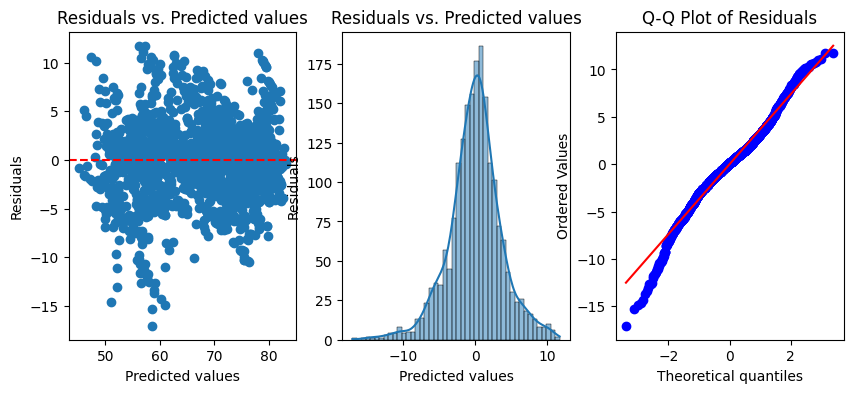

In [129]:
fig, ax = plt.subplots(1, 3, figsize=(10,4))
ax[0].scatter(results.fittedvalues, results.resid)
ax[0].set_xlabel("Predicted values")
ax[0].set_ylabel("Residuals")
ax[0].set_title("Residuals vs. Predicted values")
ax[0].axhline(y=0, color='red', linestyle='--')

sns.histplot(results.resid, kde=True, ax=ax[1])
ax[1].set_xlabel("Predicted values")
ax[1].set_ylabel("Residuals")
ax[1].set_title("Residuals vs. Predicted values")

stats.probplot(results.resid, dist="norm", plot=ax[2])
ax[2].set_title("Q-Q Plot of Residuals")
# fig.tight_layout()
plt.show()

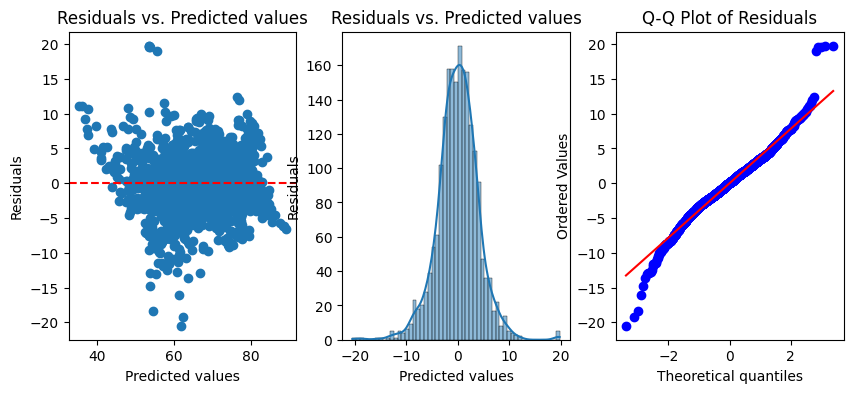

In [131]:
fig, ax = plt.subplots(1, 3, figsize=(10,4))
ax[0].scatter(results2.fittedvalues, results2.resid)
ax[0].set_xlabel("Predicted values")
ax[0].set_ylabel("Residuals")
ax[0].set_title("Residuals vs. Predicted values")
ax[0].axhline(y=0, color='red', linestyle='--')

sns.histplot(results2.resid, kde=True, ax=ax[1])
ax[1].set_xlabel("Predicted values")
ax[1].set_ylabel("Residuals")
ax[1].set_title("Residuals vs. Predicted values")

stats.probplot(results2.resid, dist="norm", plot=ax[2])
ax[2].set_title("Q-Q Plot of Residuals")
# fig.tight_layout()
plt.show()

In [324]:
def transform_coeffs(parameters):
    param_dict = {name.replace('yjt_', ''): val for name, val in zip(parameters.index, parameters.values) if name.startswith('yjt')}
    # print(param_dict)
    
    transform_dict = {col: np.nan for col in skewed_features}
    for key in transform_dict.keys():
        try:
            transform_dict[key] = param_dict[key]
        except KeyError:
            transform_dict[key] = np.nan
    transform_df = pd.DataFrame(transform_dict, index=[0])
    inv_transformed = pd.Series(transformer.inverse_transform(transform_df)[0], index=skewed_features)
    return inv_transformed
    
    # param_df = pd.DataFrame(parameters, columns=['Coef.'])
    # param_df['Transformed Coef.'] = inv_transformed
    
    

In [329]:
a = transform_coeffs(results.params).dropna()
a

infant_deaths             7.147175e+02
percentage_expenditure    1.416769e+03
measles                   9.086736e+00
under-five_deaths        -1.144999e+00
diphtheria                9.744033e+01
hiv/aids                 -3.708191e-01
gdp                       5.639754e+02
population                2.989283e+06
thinness_5-9_years        1.985389e+00
dtype: float64

In [330]:
b = pd.DataFrame(results.params, columns=['Coef.'])
b

,Coef.
const,62.517388
status,0.826802
adult_mortality,-0.014718
alcohol,-0.083801
hepatitis_b,-0.012030
income_composition_of_resources,8.963176
schooling,0.324540
yjt_infant_deaths,2.061786
yjt_percentage_expenditure,1.259309
yjt_measles,-0.232925


In [333]:
b['Inv. Coef.'] = b['Coef.'].copy()
b

,Coef.,Inv. Coef.
const,62.517388,62.517388
status,0.826802,0.826802
adult_mortality,-0.014718,-0.014718
alcohol,-0.083801,-0.083801
hepatitis_b,-0.012030,-0.012030
income_composition_of_resources,8.963176,8.963176
schooling,0.324540,0.324540
yjt_infant_deaths,2.061786,2.061786
yjt_percentage_expenditure,1.259309,1.259309
yjt_measles,-0.232925,-0.232925


In [338]:
for i in b.index:
    if i.startswith('yjt_'):
        b.loc[i, 'Inv. Coef.'] = a[i.replace('yjt_', '')]
    else:
        b.loc[i, 'Inv. Coef.'] = np.nan
        
b

,Coef.,Inv. Coef.
const,62.517388,NaN
status,0.826802,NaN
adult_mortality,-0.014718,NaN
alcohol,-0.083801,NaN
hepatitis_b,-0.012030,NaN
income_composition_of_resources,8.963176,NaN
schooling,0.324540,NaN
yjt_infant_deaths,2.061786,7.147175e+02
yjt_percentage_expenditure,1.259309,1.416769e+03
yjt_measles,-0.232925,9.086736e+00


In [364]:
c = pd.DataFrame({name: 1 for name in transformer.get_feature_names_out()}, index=[0])
c['thinness__1-19_years'] = np.nan
c

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years
0,1,1,1,1,1,1,1,1,NaN,1


In [365]:
d = pd.DataFrame(transformer.inverse_transform(c), columns=c.columns)
d

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years
0,30.957712,835.114948,745.80113,42.733383,98.644609,1.356526,7880.343607,1.495341e+07,NaN,8.885104


In [271]:
new = pd.DataFrame(columns=skewed_features)
new

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years


,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years


In [ ]:
for col in new.columns:

In [163]:
print(transformer.get_feature_names_out())

['infant_deaths' 'percentage_expenditure' 'measles' 'under-five_deaths'
 'diphtheria' 'hiv/aids' 'gdp' 'population' 'thinness__1-19_years'
 'thinness_5-9_years']


In [265]:
skewed_features

['infant_deaths',
 'percentage_expenditure',
 'measles',
 'under-five_deaths',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness__1-19_years',
 'thinness_5-9_years']

In [151]:
inv_list = {name.replace('yjt_', ''): val for name, val in zip(results.params.index, results.params.values) if name.startswith('yjt')}
inv_list

{'infant_deaths': 2.0617858535818807,
 'percentage_expenditure': 1.2593090080188714,
 'measles': -0.23292505793518897,
 'under-five_deaths': -3.04463586279627,
 'diphtheria': 0.9006181413905466,
 'hiv/aids': -3.716586416612138,
 'gdp': -0.4787790861059926,
 'population': 0.3025957788728136,
 'thinness_5-9_years': -0.6035788071804459}

In [252]:
a = df_transformed.iloc[:,-10:].rename(columns={col: col.replace('yjt_', '') for col in df_transformed.iloc[:,-10:]}).iloc[:5]
a

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years
0,1.292426,-0.224847,1.097494,1.267016,-1.110469,-0.778555,-0.459525,1.383765,1.767381,1.766530
1,1.304939,-0.209318,0.903062,1.280495,-1.236867,-0.778555,-0.433605,-0.534863,1.786748,1.779720
2,1.316997,-0.211396,0.870807,1.293436,-1.153627,-0.778555,-0.416891,1.354096,1.799468,1.792757
3,1.334293,-0.178525,1.281862,1.309920,-1.021032,-0.778555,-0.384798,0.390167,1.812038,1.812032
4,1.345336,-1.352270,1.297391,1.325595,-0.974735,-0.778555,-1.635897,0.301131,1.830620,1.824701


In [254]:
pd.DataFrame(transformer.inverse_transform(a), columns=a.columns)

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years
0,62.0,71.279624,1154.0,83.0,65.0,0.1,584.259210,33736494.0,17.2,17.3
1,64.0,73.523582,492.0,86.0,62.0,0.1,612.696514,327582.0,17.5,17.5
2,66.0,73.219243,430.0,89.0,64.0,0.1,631.744976,31731688.0,17.7,17.7
3,69.0,78.184215,2787.0,93.0,67.0,0.1,669.959000,3696958.0,17.9,18.0
4,71.0,7.097109,3013.0,97.0,68.0,0.1,63.537231,2978599.0,18.2,18.2


In [230]:
df[skewed_features]

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years
0,62,71.279624,1154,83,65.0,0.1,584.259210,33736494.0,17.2,17.3
1,64,73.523582,492,86,62.0,0.1,612.696514,327582.0,17.5,17.5
2,66,73.219243,430,89,64.0,0.1,631.744976,31731688.0,17.7,17.7
3,69,78.184215,2787,93,67.0,0.1,669.959000,3696958.0,17.9,18.0
4,71,7.097109,3013,97,68.0,0.1,63.537231,2978599.0,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...
1982,27,0.000000,31,42,65.0,33.6,454.366654,12777511.0,9.4,9.4
1983,26,0.000000,998,41,68.0,36.7,453.351155,12633897.0,9.8,9.9
1984,25,0.000000,304,40,71.0,39.8,57.348340,125525.0,1.2,1.3
1985,25,0.000000,529,39,75.0,42.1,548.587312,12366165.0,1.6,1.7


In [308]:
inv_list

{'infant_deaths': 2.0617858535818807,
 'percentage_expenditure': 1.2593090080188714,
 'measles': -0.23292505793518897,
 'under-five_deaths': -3.04463586279627,
 'diphtheria': 0.9006181413905466,
 'hiv/aids': -3.716586416612138,
 'gdp': -0.4787790861059926,
 'population': 0.3025957788728136,
 'thinness_5-9_years': -0.6035788071804459}

In [309]:
for key in inv_list.keys():
    inv_list[key] = 1
inv_list

{'infant_deaths': 1,
 'percentage_expenditure': 1,
 'measles': 1,
 'under-five_deaths': 1,
 'diphtheria': 1,
 'hiv/aids': 1,
 'gdp': 1,
 'population': 1,
 'thinness_5-9_years': 1}

In [310]:
new = pd.DataFrame(inv_list, index=[0])
new.insert(8, 'thinness__1-19_years', [np.nan])
new

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years
0,1,1,1,1,1,1,1,1,NaN,1


In [312]:
pd.DataFrame(transformer.inverse_transform(new), columns=new.columns)

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years
0,30.957712,835.114948,745.80113,42.733383,98.644609,1.356526,7880.343607,1.495341e+07,NaN,8.885104


In [178]:
results2.params

const                              51.929614
status                              1.265243
adult_mortality                    -0.015150
infant_deaths                       0.088622
alcohol                            -0.125369
percentage_expenditure              0.000417
bmi                                 0.057820
under-five_deaths                  -0.066021
polio                               0.012021
total_expenditure                   0.063501
diphtheria                          0.019496
hiv/aids                           -0.471106
thinness__1-19_years               -0.043964
income_composition_of_resources     8.268129
schooling                           0.876938
dtype: float64

In [200]:
np.array([format(i, 'f') for i in transformer.inverse_transform(new)[0]])

array(['714.717461', '1416.769214', '9.086736', '-1.144999', '97.440326',
       '-0.370819', '563.975437', '2989283.178087', 'nan', '1.985389'],
      dtype='<U14')

In [204]:
import tabula

In [217]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [216]:
tables[1]

,expenditure,as a percentage of total government,Unnamed: 0
0,NaN,expenditure (%),NaN
1,Diphtheria,Diphtheria tetanus toxoid and pertussis,Integer
2,NaN,(DTP3) immunization coverage among,NaN
3,NaN,1-year-olds (%),NaN
4,HIV/AIDS,Deaths per 1 000 live births HIV/AIDS,Integer
5,NaN,(0-4 years),NaN
6,GDP,Gross Domestic Product per capita (in,Integer
7,NaN,USD),NaN
8,Population,Population of the country,Integer
9,Thinness 10-19,Prevalence of thinness among children and,Integer


In [215]:
tables[0]['Column name'].dropna()

0             Country
1                Year
2              Status
3     Life expectancy
4     Adult mortality
7       Infant deaths
9             Alcohol
11         Percentage
12        expenditure
13        Hepatitis B
15            Measles
18                BMI
20         Under-five
21             deaths
22              Polio
24              Total
Name: Column name, dtype: object

In [202]:
df[['measles']].describe()

,measles
count,1987.000000
mean,2729.561651
std,12102.389143
min,0.000000
25%,0.000000
50%,20.000000
75%,499.500000
max,212183.000000


In [155]:
skewed_data

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years
0,62,71.279624,1154,83,65.0,0.1,584.259210,33736494.0,17.2,17.3
1,64,73.523582,492,86,62.0,0.1,612.696514,327582.0,17.5,17.5
2,66,73.219243,430,89,64.0,0.1,631.744976,31731688.0,17.7,17.7
3,69,78.184215,2787,93,67.0,0.1,669.959000,3696958.0,17.9,18.0
4,71,7.097109,3013,97,68.0,0.1,63.537231,2978599.0,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...
1982,27,0.000000,31,42,65.0,33.6,454.366654,12777511.0,9.4,9.4
1983,26,0.000000,998,41,68.0,36.7,453.351155,12633897.0,9.8,9.9
1984,25,0.000000,304,40,71.0,39.8,57.348340,125525.0,1.2,1.3
1985,25,0.000000,529,39,75.0,42.1,548.587312,12366165.0,1.6,1.7


In [152]:
pd.DataFrame(inv_list, index=range(len(inv_list)))

,infant_deaths,percentage_expenditure,measles,under-five_deaths,diphtheria,hiv/aids,gdp,population,thinness_5-9_years
0,2.061786,1.259309,-0.232925,-3.044636,0.900618,-3.716586,-0.478779,0.302596,-0.603579
1,2.061786,1.259309,-0.232925,-3.044636,0.900618,-3.716586,-0.478779,0.302596,-0.603579
2,2.061786,1.259309,-0.232925,-3.044636,0.900618,-3.716586,-0.478779,0.302596,-0.603579
3,2.061786,1.259309,-0.232925,-3.044636,0.900618,-3.716586,-0.478779,0.302596,-0.603579
4,2.061786,1.259309,-0.232925,-3.044636,0.900618,-3.716586,-0.478779,0.302596,-0.603579
5,2.061786,1.259309,-0.232925,-3.044636,0.900618,-3.716586,-0.478779,0.302596,-0.603579
6,2.061786,1.259309,-0.232925,-3.044636,0.900618,-3.716586,-0.478779,0.302596,-0.603579
7,2.061786,1.259309,-0.232925,-3.044636,0.900618,-3.716586,-0.478779,0.302596,-0.603579
8,2.061786,1.259309,-0.232925,-3.044636,0.900618,-3.716586,-0.478779,0.302596,-0.603579


In [153]:
transformer.inverse_transform(pd.DataFrame(inv_list, index=range(len(inv_list))))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- thinness__1-19_years


In [137]:
# Reverse-transform the coefficients for specific features
features_to_reverse_transform = ['x1']
selected_indices = [transformed_data.columns.get_loc('yjt_'+col) for col in features_to_reverse_transform]
inverse_transformed_coefficients = transformer.inverse_transform([coefficients[:, selected_indices]])

# Print the reverse-transformed coefficients
print("Reverse-transformed coefficients for selected features:", inverse_transformed_coefficients)

AttributeError: 'OLS' object has no attribute 'coef_'

In [134]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     762.8
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:36:45   Log-Likelihood:                -5429.8
No. Observations:                1987   AIC:                         1.089e+04
Df Residuals:                    1971   BIC:                         1.098e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              62.5174      0.606    103.208      0.000      61.329      63.705
status                              0.8268      0.329      2.513      0.012       0.182       1.472
adult_mortality                    -0.0147      0.001    -18.172      0.000      -0.016      -0.013
alcohol                            -0.0838      0.031     -2.681      0.007      -0.145      -0.023
hepatitis_b                        -0.0120      0.004     -3.344      0.001      -0.019      -0.005
income_composition_of_resources     8.9632      0.727     12.323      0.000       7.537      10.390
schooling                           0.3245      0.053      6.067      0.000       0.220       0.429
yjt_infant_deaths                   2.0618      0.848      2.430      0.015       0.398       3.726
yjt_percentage_expenditure          1.2593      0.239      5.274      0.000       0.791       1.728
yjt_measles                        -0.2329      0.110     -2.125      0.034      -0.448      -0.018
yjt_under-five_deaths              -3.0446      0.866     -3.518      0.000      -4.742      -1.347
yjt_diphtheria                      0.9006      0.122      7.365      0.000       0.661       1.140
yjt_hiv/aids                       -3.7166      0.129    -28.895      0.000      -3.969      -3.464
yjt_gdp                            -0.4788      0.240     -1.996      0.046      -0.949      -0.008
yjt_population                      0.3026      0.102      2.961      0.003       0.102       0.503
yjt_thinness_5-9_years             -0.6036      0.110     -5.476      0.000      -0.820      -0.387
==============================================================================
Omnibus:                       86.966   Durbin-Watson:                   0.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.849
Skew:                          -0.251   Prob(JB):                     2.43e-44
Kurtosis:                       4.475   Cond. No.                     3.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
features_to_reverse_transform = ['x1']
selected_indices = [transformed_data.columns.get_loc('yjt_'+col) for col in features_to_reverse_transform]
inverse_transformed_coefficients = transformer.inverse_transform([coefficients[:, selected_indices]])

In [9]:
from sklearn.linear_model import Lasso, LassoCV
lasso_model = Lasso()  # Set the regularization strength (alpha)
lasso_model.fit(df_ols, y)

NameError: name 'df_ols' is not defined

In [30]:
coefficients = lasso_model.coef_
print(coefficients)

[ 0.00000000e+00 -2.28513198e-02 -0.00000000e+00  1.30752503e-04
 -0.00000000e+00  6.44917085e-02  1.39685193e-02  0.00000000e+00
  3.33282799e-02  7.36414112e-05 -4.14913847e-02 -1.11999893e-02
  0.00000000e+00  7.91807846e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.22037102e+00 -0.00000000e+00]


In [33]:
lasso_model.score

<bound method RegressorMixin.score of Lasso()>

In [34]:
pd.DataFrame({'Feature': lasso_model.feature_names_in_,
              'coefficients': lasso_model.coef_})

,Feature,coefficients
0,status,0.000000
1,adult_mortality,-0.022851
2,alcohol,-0.000000
3,percentage_expenditure,0.000131
4,hepatitis_b,-0.000000
5,bmi,0.064492
6,polio,0.013969
7,total_expenditure,0.000000
8,diphtheria,0.033328
9,gdp,0.000074


In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     586.1
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:48:59   Log-Likelihood:                -5450.9
No. Observations:                1987   AIC:                         1.094e+04
Df Residuals:                    1967   BIC:                         1.105e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              58.6239      0.611     95.876      0.000      57.425      59.823
status                              0.5590      0.342      1.633      0.103      -0.112       1.230
adult_mortality                    -0.0149      0.001    -18.186      0.000      -0.017      -0.013
alcohol                            -0.0688      0.032     -2.178      0.030      -0.131      -0.007
percentage_expenditure              0.0004      0.000      2.008      0.045    8.51e-06       0.001
hepatitis_b                        -0.0070      0.004     -1.941      0.052      -0.014     7.4e-05
bmi                                 0.0152      0.006      2.462      0.014       0.003       0.027
polio                               0.0061      0.005      1.238      0.216      -0.004       0.016
total_expenditure                   0.0443      0.040      1.113      0.266      -0.034       0.122
diphtheria                          0.0193      0.005      3.648      0.000       0.009       0.030
gdp                              5.365e-06   2.86e-05      0.188      0.851   -5.07e-05    6.15e-05
thinness__1-19_years                0.0163      0.048      0.337      0.736      -0.079       0.111
thinness_5-9_years                 -0.0858      0.048     -1.791      0.073      -0.180       0.008
income_composition_of_resources     9.3125      0.736     12.645      0.000       7.868      10.757
schooling                           0.3711      0.054      6.884      0.000       0.265       0.477
yjt_infant_deaths                   1.6198      0.860      1.883      0.060      -0.067       3.307
yjt_measles                        -0.3385      0.112     -3.032      0.002      -0.557      -0.120
yjt_under-five_deaths              -2.6524      0.879     -3.016      0.003      -4.377      -0.928
yjt_hiv/aids                       -3.8142      0.131    -29.027      0.000      -4.072      -3.557
yjt_population                      0.3138      0.104      3.024      0.003       0.110       0.517
==============================================================================
Omnibus:                       90.553   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.270
Skew:                          -0.252   Prob(JB):                     1.09e-47
Kurtosis:                       4.536   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
?results.summary

Signature:
results.summary(
    yname: 'str | None' = None,
    xname: 'Sequence[str] | None' = None,
    title: 'str | None' = None,
    alpha: 'float' = 0.05,
    slim: 'bool' = False,
)
Docstring:
Summarize the Regression Results.

Parameters
----------
yname : str, optional
    Name of endogenous (response) variable. The Default is `y`.
xname : list[str], optional
    Names for the exogenous variables. Default is `var_##` for ## in
    the number of regressors. Must match the number of parameters
    in the model.
title : str, optional
    Title for the top table. If not None, then this replaces the
    default title.
alpha : float, optional
    The significance level for the confidence intervals.
slim : bool, optional
    Flag indicating to produce reduced set or diagnostic information.
    Default is False.

Returns
-------
Summary
    Instance holding the summary tables and text, which can be printed
    or converted to various output formats.

See Also
--------
statsmodels.ioli